In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from collections import defaultdict
import glob, os
import matplotlib.ticker as mticker

In [86]:
# hierarchy:
# plot_multi_threads.ipynb
#                        ./ multithreads / blackschole / result-xxxx-4.0GHz+maxFreq+slowDVFS_parsec-swaptions-simsmall-1 / sim.out

In [87]:
path = './multithreads/'
# set it as input
frequency = 4
freq_mode = 'maxFreq'
DVFS_mode = 'slowDVFS'
input_set = 'simsmall'

In [88]:
benchmarks = []

In [89]:
def get_sim_out(benchmark):
    results = {}
    for subdir in os.listdir(path + benchmark +'/'):
        # get the subdirectory name and use it to open file
        with open(path + benchmark +'/'+str(subdir) + '/' + 'sim.out', 'rb') as file:         # rb: binary
            lines = file.readlines()
            #       firstline; remove '/n'; binary -> string; remove ','&' '; separate by '|'
            thread_num = int(str(subdir)[-1]) + 1
            cores = lines[0].strip().decode('ascii').replace(',','').replace(' ', '').split('|')[1:thread_num +1]    
            times = lines[4].strip().decode('ascii').replace(',','').replace(' ', '').split('|')[1:thread_num +1]
            times = [eval(i) for i in times]      # convert string to int
            idle_times = lines[5].strip().decode('ascii').replace(',','').replace(' ', '').split('|')[1:thread_num +1]
            idle_times = [eval(i) for i in idle_times]
            
            idle_perc = lines[6].strip().decode('ascii').replace(',','').replace(' ', '').split('|')[1:thread_num +1]
            
            result_dict = {'dir': subdir[25:],
                           #'thread': thread_num,
                           'average_time': sum(times)/thread_num,
                           'cores': cores,          # only reserve useful data
                           'times': times,
                           'idle_times': idle_times,
                           'idle_perc':idle_perc
                          }
            results[thread_num] = result_dict
    results = dict(sorted(results.items()))
    return results

In [107]:
# generate lists for plotting lines
x_a = [] # 2-dimension array
y_a = [] # 2-dimension array

x_label = 'Thread num'
y_label = 'Execution time(ns)'
labels = []
# open files and get results
for benchmark in os.listdir(path +'/'):
    res = get_sim_out(benchmark)
    labels.append(benchmark)
    y_temp = []
    x_temp = []
    for key, item in res.items():
        x_temp.append(key)
        y_temp.append(item['average_time'])
    y_a.append(y_temp)
    x_a.append(x_temp)


In [108]:
y_dict

{'blackschole': [52794600.0, 30471400.0, 23243400.0],
 'canneal': [583472300.0, 607175800.0, 669472300.0],
 'streamcluster': [242646500.0, 131106300.0, 93372700.0],
 'swaptions': [142162500.0, 70998500.0, 53482700.0]}

In [109]:
title = '' # TODO

In [110]:
y_a

[[52794600.0, 30471400.0, 23243400.0],
 [168972400.0, 93288000.0],
 [669472300.0, 607175800.0, 583472300.0],
 [378729200.0, 203626500.0],
 [242646500.0, 131106300.0, 93372700.0],
 [142162500.0, 70998500.0, 53482700.0],
 [69129400.0, 60429400.0]]

In [133]:

# http://matplotlib.org/users/legend_guide.html
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
# https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line
# https://stackoverflow.com/questions/52229875/how-to-force-matplotlib-to-show-values-on-x-axis-as-integers
def plot_line(x_a, y_a, labels, x_label, y_label, title, adjust_benchmark=[]):
    
    x = x_a
    y = y_a
    linestyle = [
     #(0, (1, 10)),
     #(0, (1, 1)),
     #(0, (1, 1)),
     (5, (10, 3)),
     (0, (5, 10)),
     
     (0, (3, 10, 1, 10)),
     (0, (5, 5)),
     (0, (5, 1)),
     (0, (3, 5, 1, 5)),
     (0, (3, 1, 1, 1)),
     (0, (3, 5, 1, 5, 1, 5)),
     (0, (3, 10, 1, 10, 1, 10)),
     (0, (3, 1, 1, 1, 1, 1))]
    markers = ['.','x','v','8','P','|','p','d','1','o','s','^','>','2','3','<','X','D','d','_']
    for i in range(len(y)):
        #mark = markers[i] if i < len(markers) else linestyle[i]    # extend if too less markers
        if labels[i] in adjust_benchmark:
            plt.plot(x[i], y[i], label=labels[i], marker=markers[i], linestyle= linestyle[i])  # adjust linestyle if two lines too closed
        else:    
            plt.plot(x[i], y[i], label=labels[i], marker=markers[i])  #, linestyle= linestyle[i]
        

    
        #plt.annotate(f'({xi}, {yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')     # coordinates

    # upper right: 1; upper left: 2; lower left: 3; lower right: 4; right: 5; center left: 6; center right: 7; lower center: 8; upper center: 9; center: 10;
    plt.legend(loc=5) 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))  # set the x value as integer (interval as 1)
    plt.show()

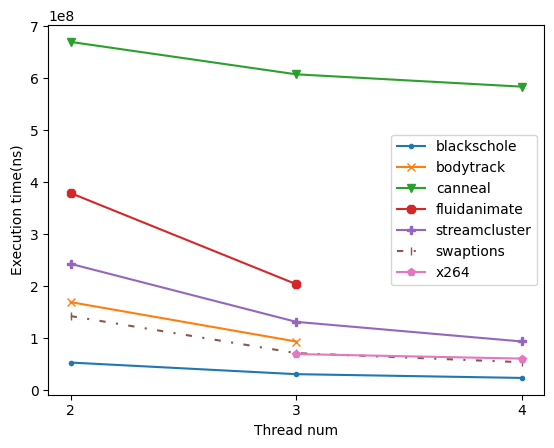

In [134]:
plot_line(x_a, y_a, labels, x_label, y_label, title, ['swaptions'])